In [1]:
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
from PIL import Image

In [2]:
image=cv2.imread('/home/jmandivarapu1/GP/Test12.jpg')

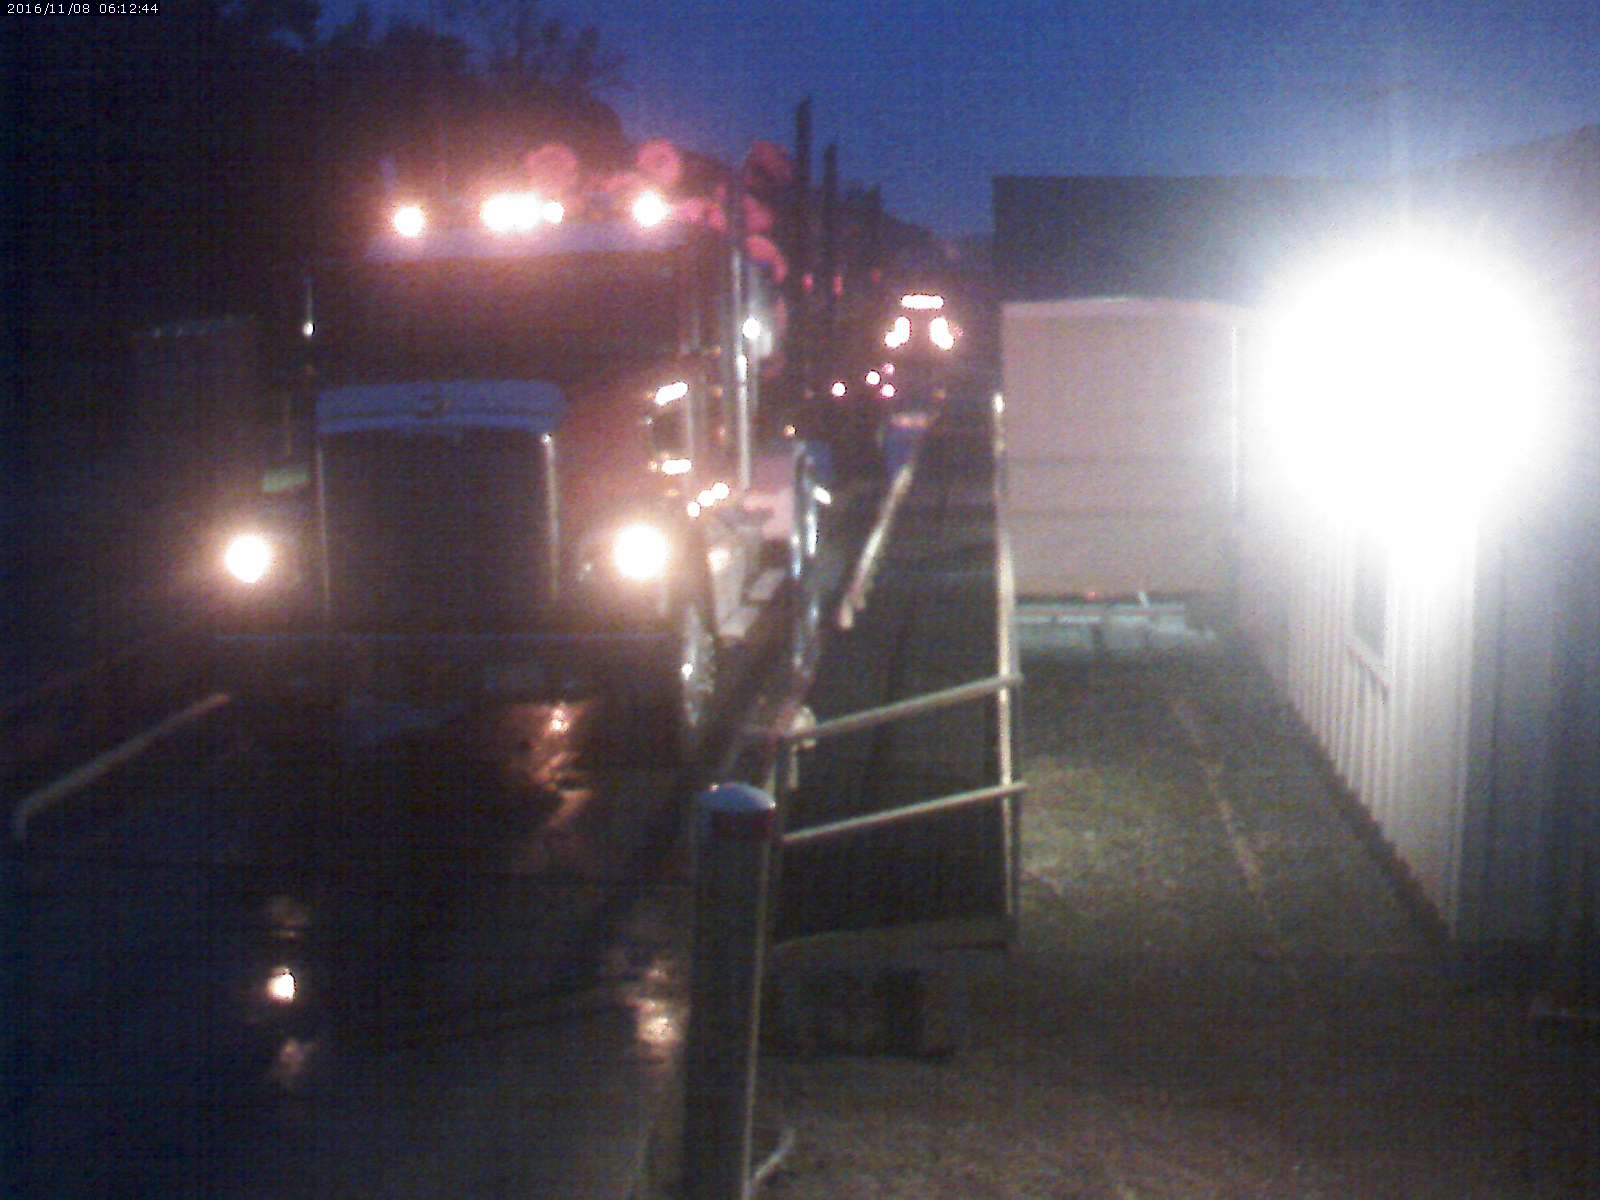

In [5]:
Image.open('Test12.jpg')

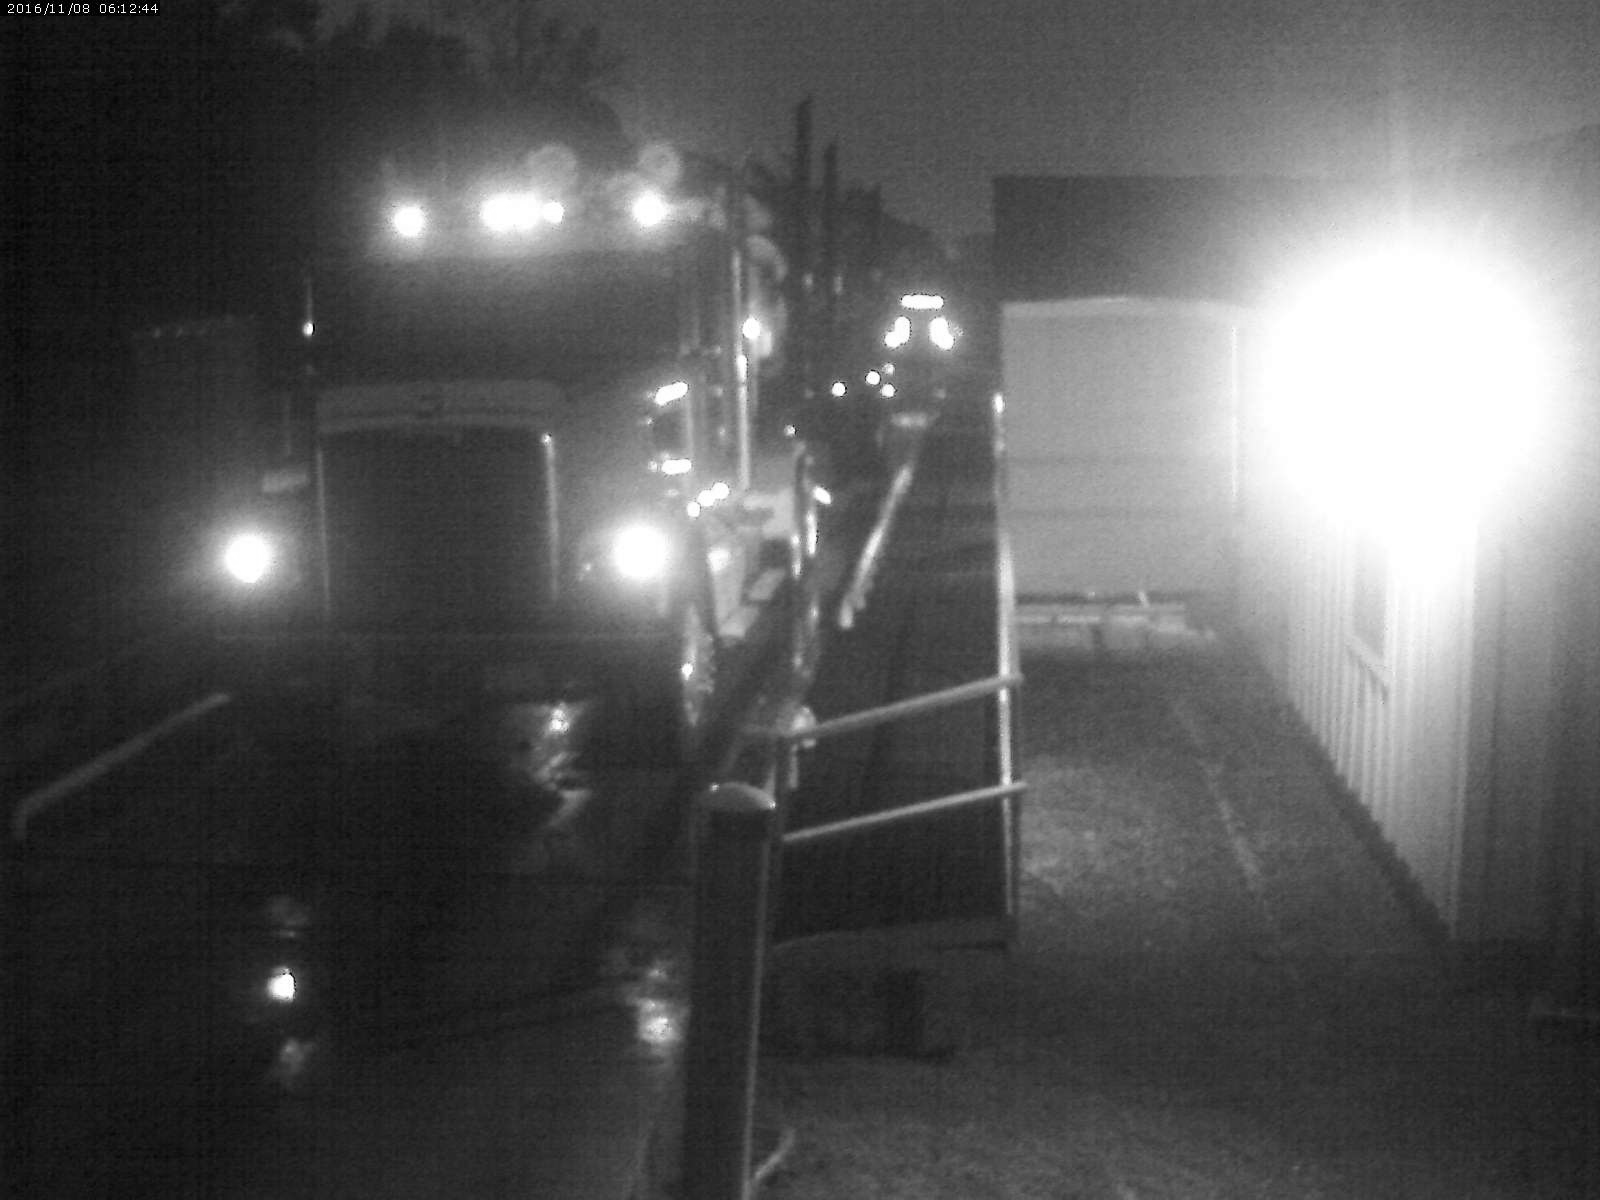

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite( "grey1.png", gray )
Image.open('grey1.png')

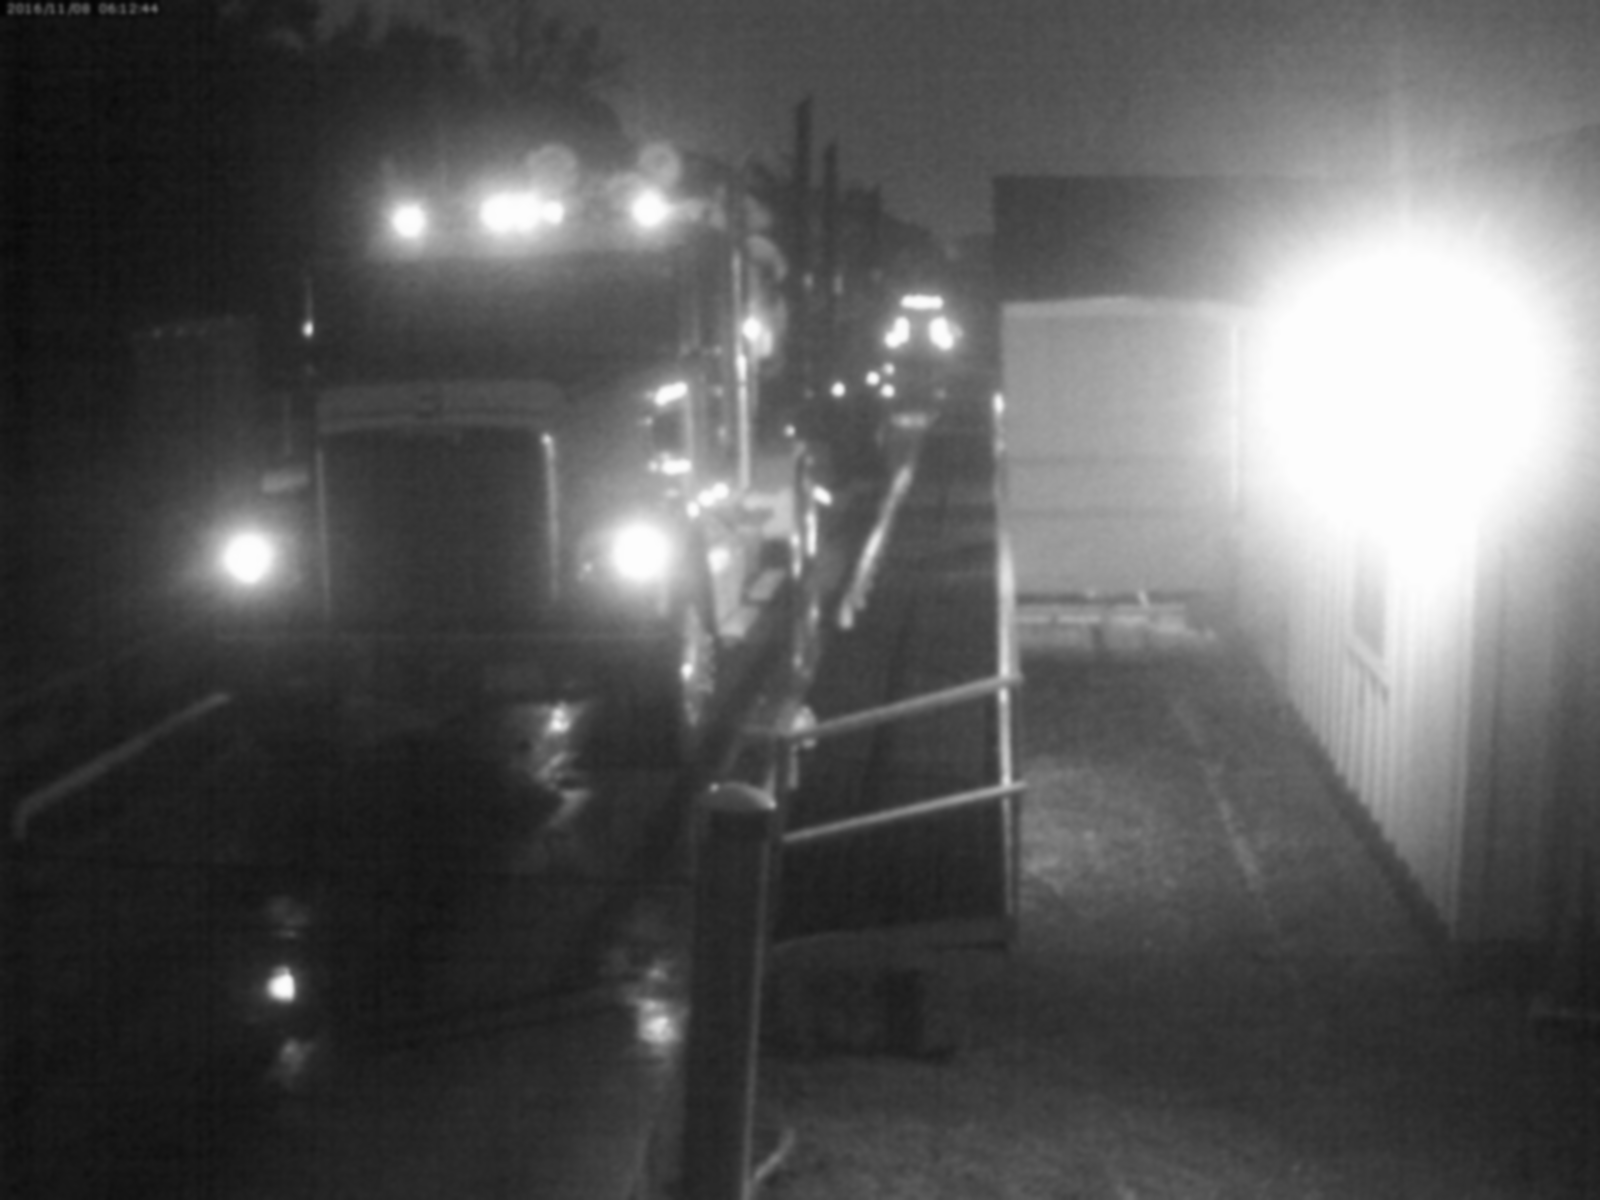

In [4]:
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
cv2.imwrite( "blur.png", blurred )
Image.open('blur.png')

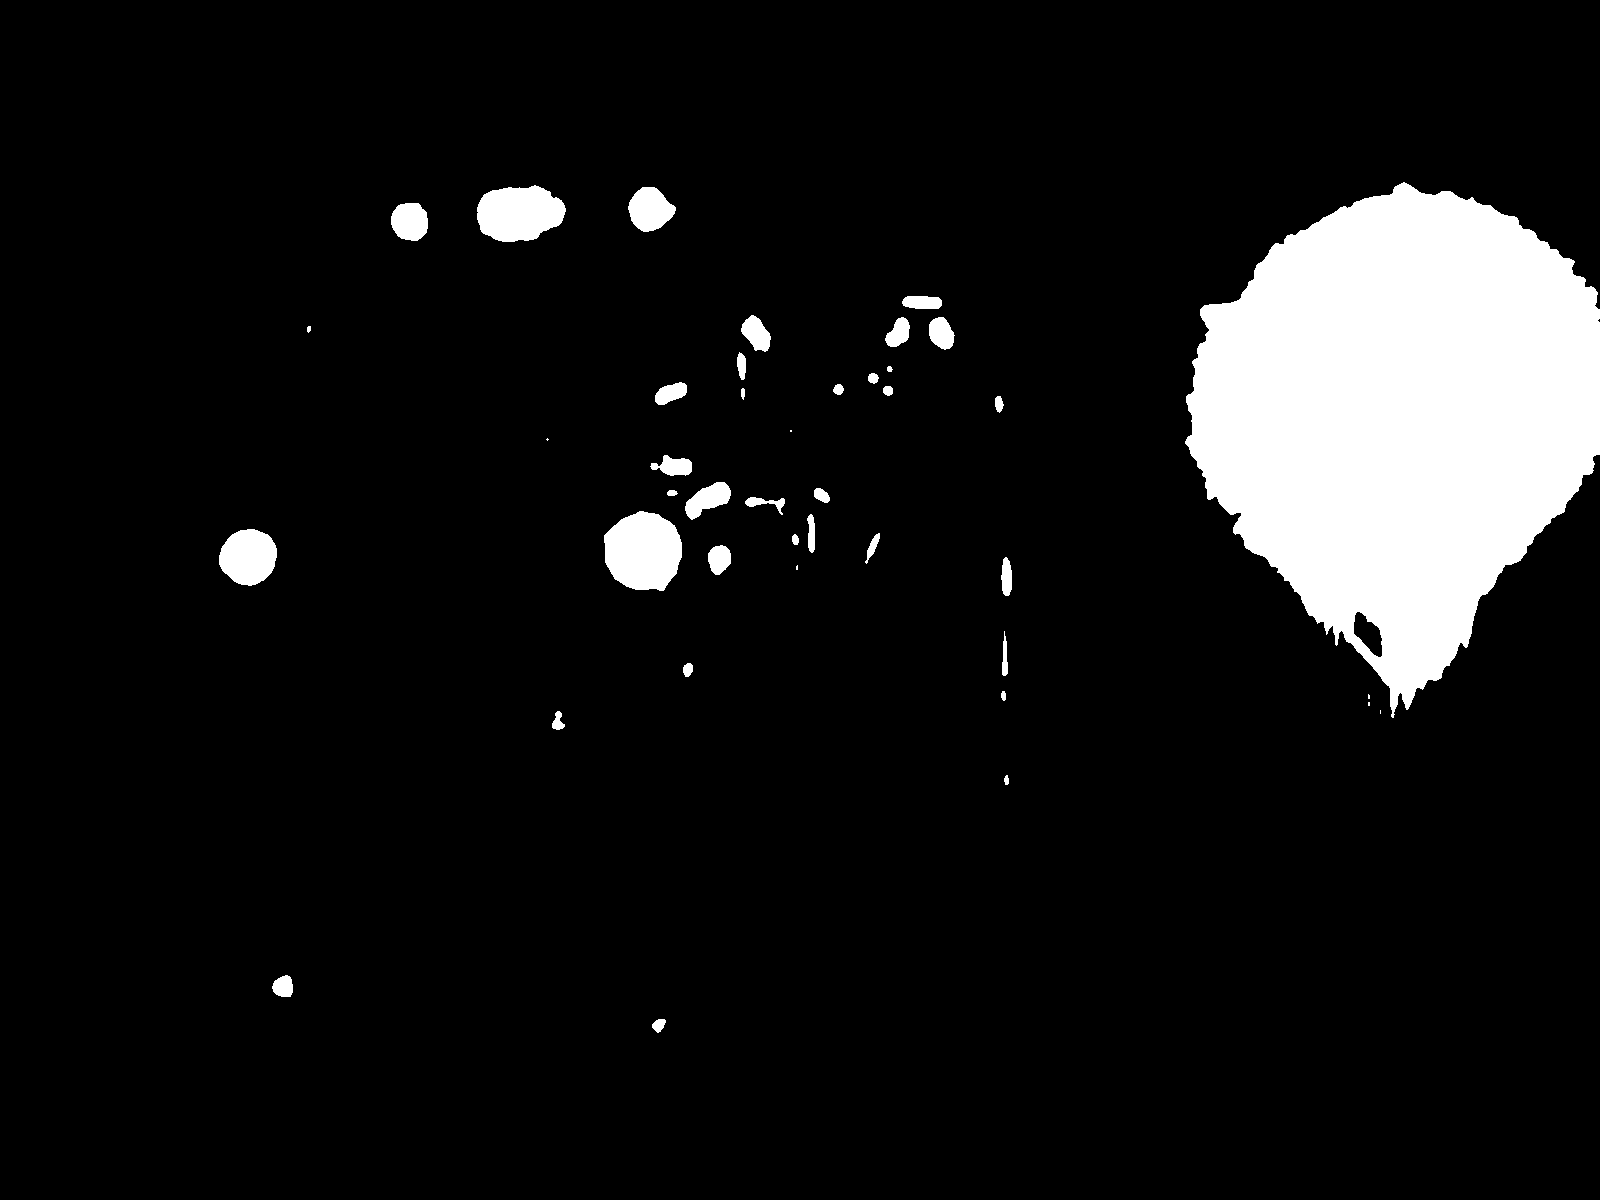

In [5]:
# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
cv2.imwrite( "thresh.png", thresh )
Image.open('thresh.png')

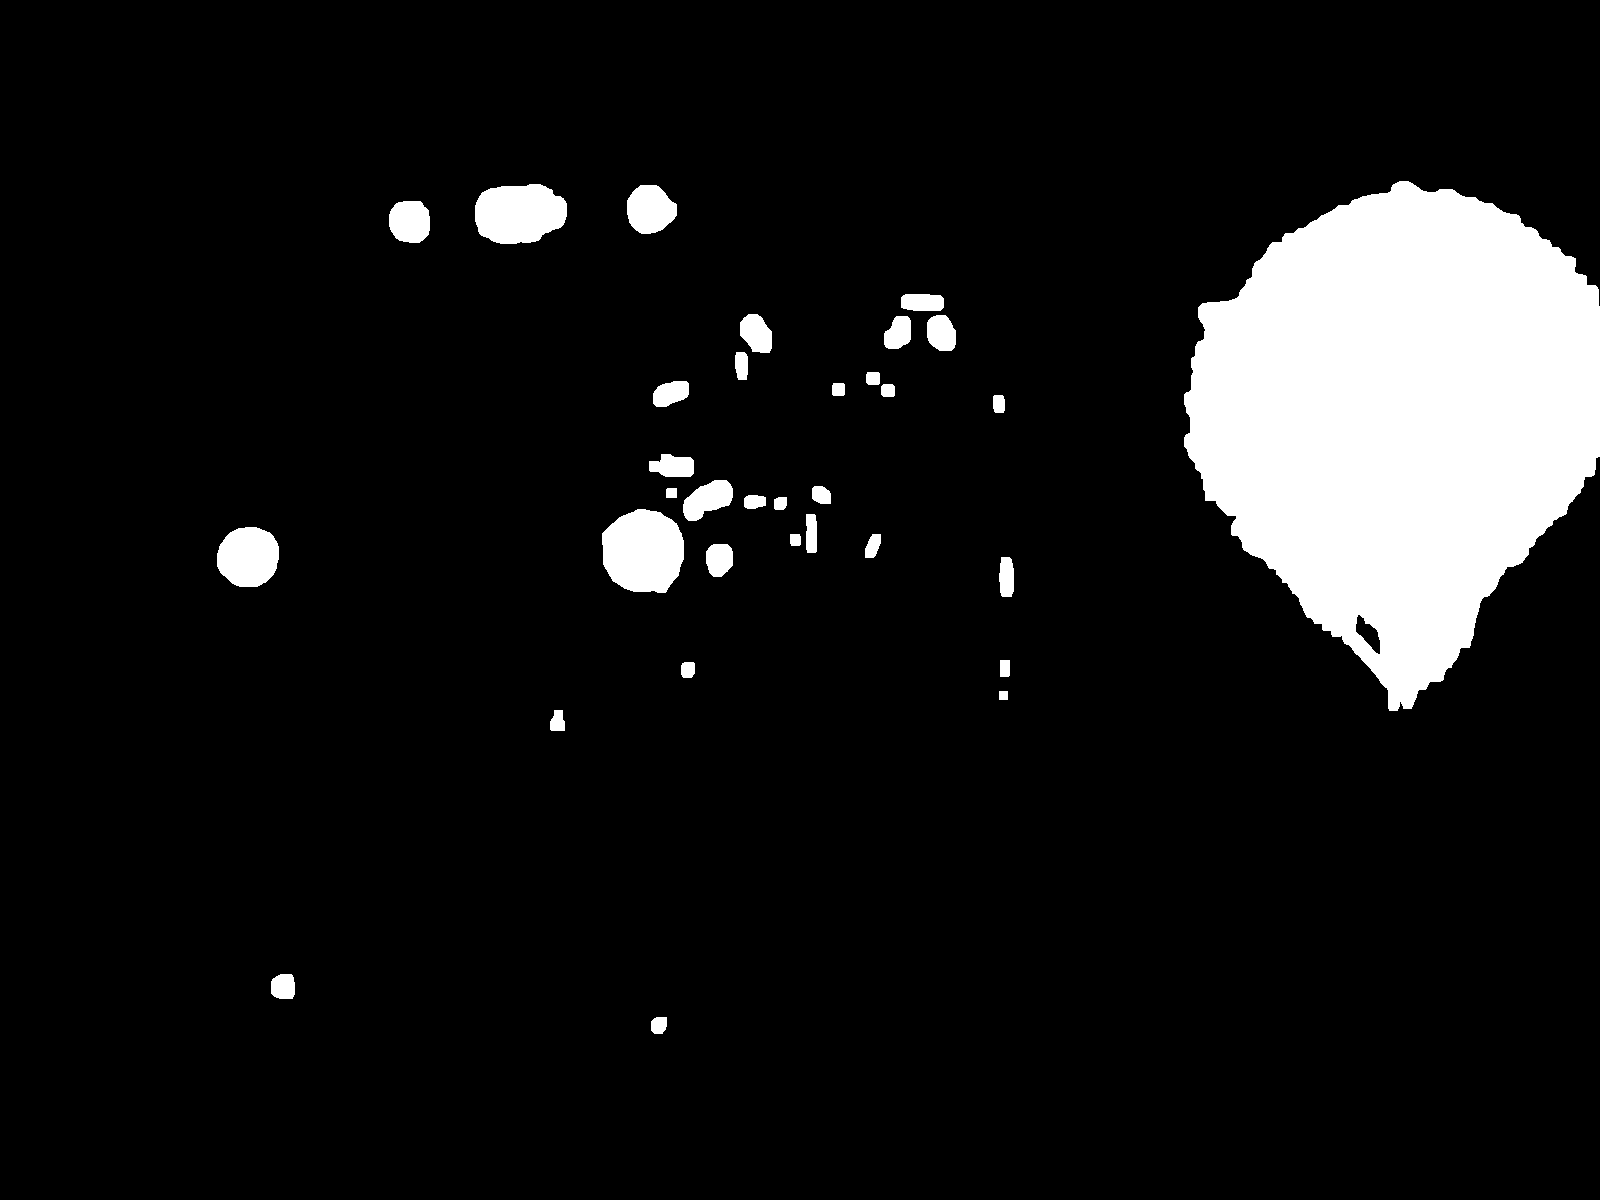

In [6]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
cv2.imwrite( "thresh.png", thresh )
Image.open('thresh.png')

In [7]:
# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
 
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 300:
		mask = cv2.add(mask, labelMask)

In [8]:
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]
 


In [9]:
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(cX), int(cY)), int(radius),(0, 0, 255), 3)
    cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


In [10]:
cv2.imwrite( "otput.png", image )


IOError: [Errno 2] No such file or directory: 'output.png'

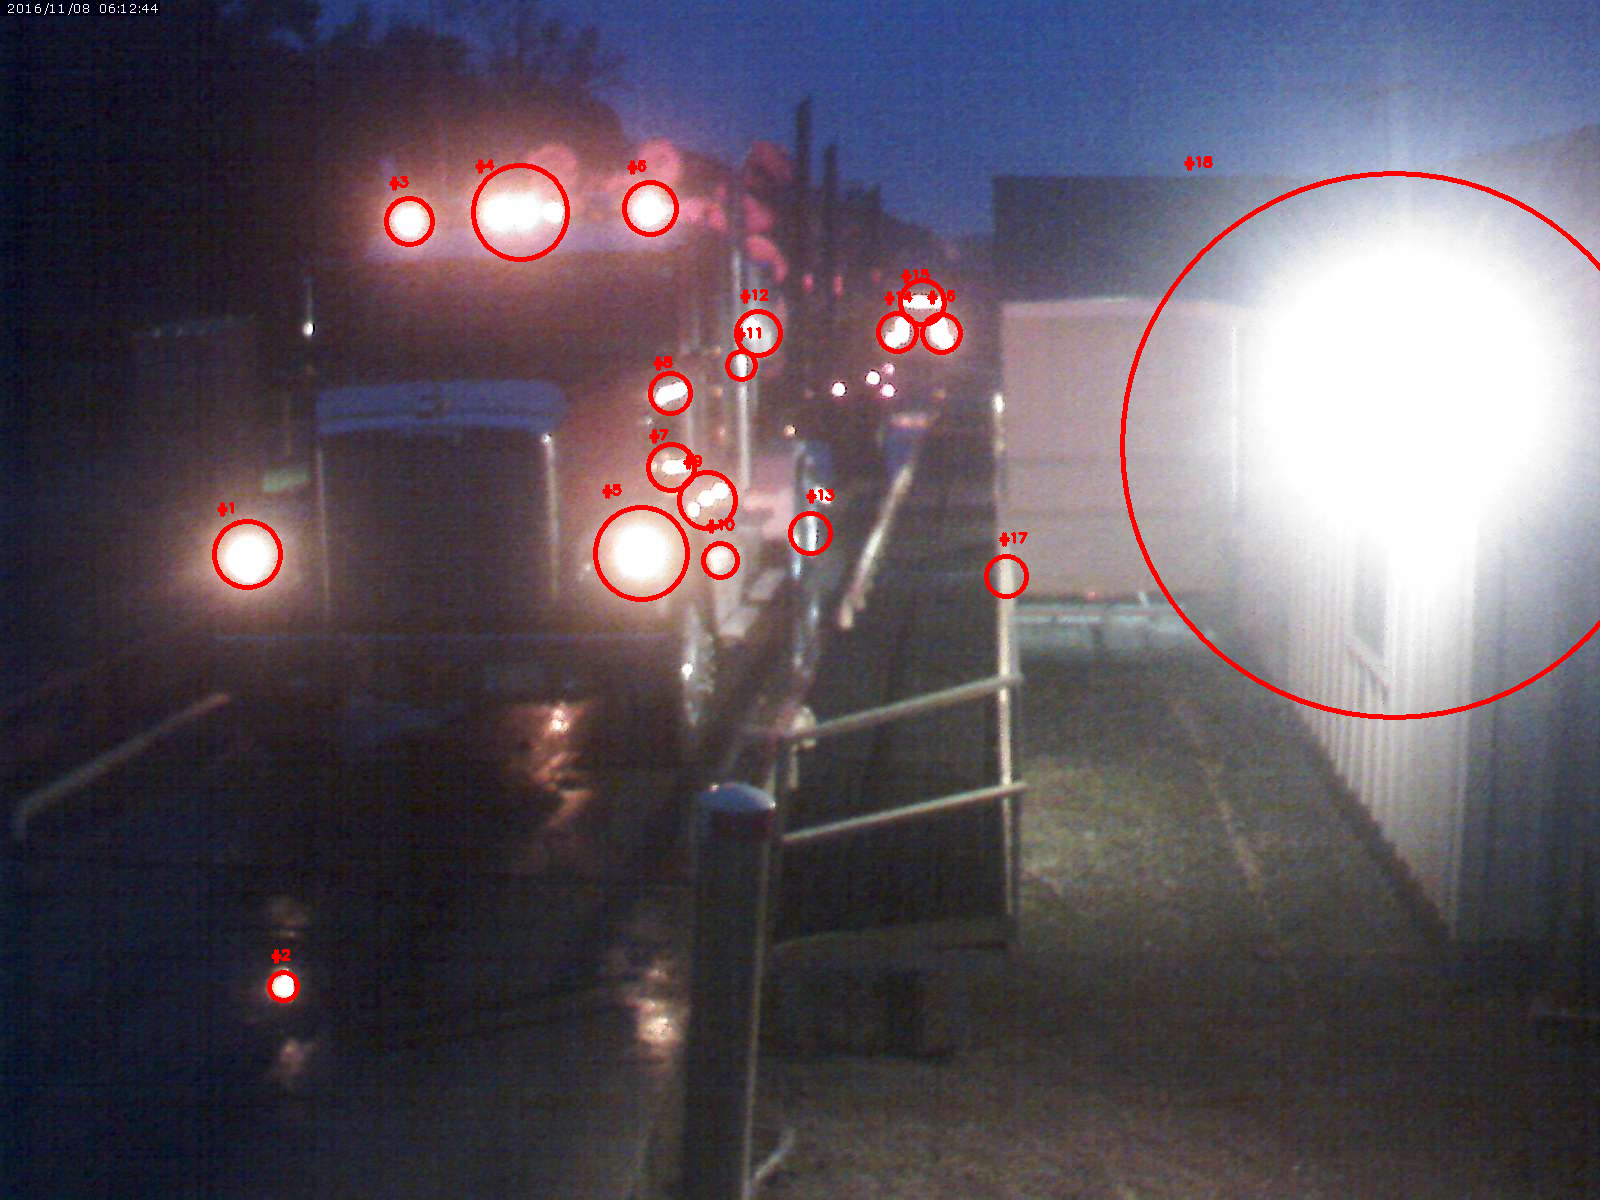

In [11]:
Image.open('otput.png')